## Python statistics Simulation and Bootstrapping

Standard imports

In [1]:
import math
import io

In [24]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
import scipy.stats
import scipy.optimize
import scipy.spatial

In [5]:
pop = pd.read_csv('grades.csv')

In [6]:
pop.head()

,grade
0,3.648651
1,5.959915
2,7.387370
3,4.047515
4,2.846912


<AxesSubplot:>

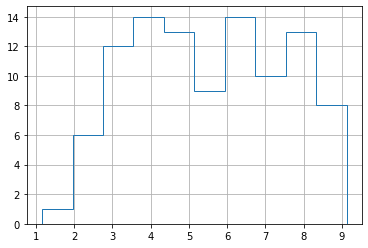

In [10]:
pop.grade.hist(histtype = 'step',bins = 10)

In [11]:
pop.grade.describe()

count    100.000000
mean       5.508561
std        1.984988
min        1.160899
25%        3.921372
50%        5.688527
75%        7.272162
max        9.120705
Name: grade, dtype: float64

Draw a sample with replacement from the grades

In [13]:
pop.sample(n=100,replace=True).describe()

,grade
count,100.000000
mean,5.908986
std,1.874903
min,1.983167
25%,4.133511
50%,5.939390
75%,7.552213
max,9.120705


Let's build a boostraped distribution of means (Generate a boostrap and take the means and repeat 1000 times)

In [34]:
bootstrap = pd.DataFrame({'mean_grade': [pop.sample(n=100,replace=True).grade.mean() for i in range(1000)]})

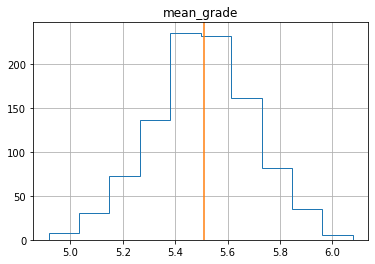

In [35]:
bootstrap.hist(histtype = 'step')
plt.axvline(pop.grade.mean(),color = 'C1')

In [40]:
bootstrap.mean_grade.quantile(0.025), bootstrap.mean_grade.quantile(0.975)

(5.109324159150651, 5.881008937844049)

Challenge: Find a confidence interval for the fraction of citizens that give Mayer Green a passing grade (5 or more)

In [45]:
pop

,grade
0,3.648651
1,5.959915
2,7.387370
3,4.047515
4,2.846912
...,...
95,3.940691
96,9.120705
97,7.842357
98,3.920676


In [63]:
bootstrap_challenge = pd.DataFrame({'meangrade': [pop.sample(n=100,replace=True).grade.mean() for i in range(1000)]})

The percentage of people failing Mayer Green: (It can be calculated in 2 ways)

In [72]:
1 - np.where(pop.grade >= 5, 1,0).sum()/ len(pop.grade)

0.43000000000000005

In [86]:
scipy.stats.percentileofscore(pop.grade, 5)

43.0

Bootstrapping: Replicate this by sampling 1000 times:

In [108]:
bootstrap_challenge = pd.DataFrame({'Passing': [scipy.stats.percentileofscore(pop.sample(100,replace = True).grade, 5) for i in range(1000)]})
bootstrap_challenge

,Passing
0,42.0
1,38.0
2,46.0
3,46.0
4,36.0
...,...
995,47.0
996,48.0
997,45.0
998,38.0


In [110]:
bootstrap_challenge.Passing.quantile(0.025), bootstrap_challenge.Passing.quantile(0.975)

(34.0, 53.0)

The 95% confidence interval for the percentage of citizens who think Mayer Green is failing is from 33% to 53%. (Overal she likely has the majority vote of the citizens)